In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import RandomForestRegressor 
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import numpy as np

In [2]:
housing_price = pd.read_csv("train.csv",index_col=0)
housing_price_test = pd.read_csv("test.csv",index_col=0)

In [3]:
# Some Data analysis

In [4]:
housing_price.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
housing_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [6]:
housing_price.shape

(1460, 80)

In [7]:
housing_price.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
# EDA 
# Missing values
X= housing_price.drop('SalePrice',axis=1)
y = housing_price['SalePrice']

In [9]:
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
missing_columns = [[col, housing_price[col].isna().sum(),(housing_price[col].isna().sum()/1460)*100] 
                   for col in housing_price.columns if housing_price[col].isna().sum() ]

In [11]:
missing_columns

[['LotFrontage', 259, 17.73972602739726],
 ['Alley', 1369, 93.76712328767123],
 ['MasVnrType', 8, 0.547945205479452],
 ['MasVnrArea', 8, 0.547945205479452],
 ['BsmtQual', 37, 2.5342465753424657],
 ['BsmtCond', 37, 2.5342465753424657],
 ['BsmtExposure', 38, 2.6027397260273974],
 ['BsmtFinType1', 37, 2.5342465753424657],
 ['BsmtFinType2', 38, 2.6027397260273974],
 ['Electrical', 1, 0.0684931506849315],
 ['FireplaceQu', 690, 47.26027397260274],
 ['GarageType', 81, 5.5479452054794525],
 ['GarageYrBlt', 81, 5.5479452054794525],
 ['GarageFinish', 81, 5.5479452054794525],
 ['GarageQual', 81, 5.5479452054794525],
 ['GarageCond', 81, 5.5479452054794525],
 ['PoolQC', 1453, 99.52054794520548],
 ['Fence', 1179, 80.75342465753424],
 ['MiscFeature', 1406, 96.30136986301369]]

In [12]:
X_train = X_train.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1)
X_valid = X_valid.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1)

In [67]:
housing_price_test = housing_price_test.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1)

In [13]:
X_valid.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
893,20,RL,70.0,8414,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,2,2006,WD,Normal
1106,60,RL,98.0,12256,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,32,0,0,0,0,0,4,2010,WD,Normal
414,30,RM,56.0,8960,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,130,0,0,0,0,3,2010,WD,Normal
523,50,RM,50.0,5000,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,24,36,0,0,0,0,10,2006,WD,Normal
1037,20,RL,89.0,12898,Pave,IR1,HLS,AllPub,Inside,Gtl,...,0,0,0,0,0,0,9,2009,WD,Normal


In [14]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
255,20,RL,70.0,8400,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,6,2010,WD,Normal
1067,60,RL,59.0,7837,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,40,0,0,0,0,0,5,2009,WD,Normal
639,30,RL,67.0,8777,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,164,0,0,0,0,5,2008,WD,Normal
800,50,RL,60.0,7200,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,264,0,0,0,0,6,2007,WD,Normal
381,50,RL,50.0,5000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,242,0,0,0,0,5,2010,WD,Normal


In [15]:
for col in X_train.columns:
    if X_train[col].dtype == 'object' and X_train[col].isna().sum():
        print(col ,X_train[col].isna().sum())

MasVnrType 6
BsmtQual 28
BsmtCond 28
BsmtExposure 28
BsmtFinType1 28
BsmtFinType2 28
Electrical 1
FireplaceQu 547
GarageType 64
GarageFinish 64
GarageQual 64
GarageCond 64


In [16]:

    for col in X_train.columns:
        if X_train[col].dtype == 'object' and X_train[col].isna().sum():
            print(col,X_train[col].unique())
            print(X_train[col].describe())

MasVnrType ['None' 'BrkFace' 'Stone' nan 'BrkCmn']
count     1162
unique       4
top       None
freq       677
Name: MasVnrType, dtype: object
BsmtQual ['TA' 'Gd' 'Fa' nan 'Ex']
count     1140
unique       4
top         TA
freq       521
Name: BsmtQual, dtype: object
BsmtCond ['TA' 'Fa' nan 'Gd' 'Po']
count     1140
unique       4
top         TA
freq      1045
Name: BsmtCond, dtype: object
BsmtExposure ['No' 'Av' 'Gd' 'Mn' nan]
count     1140
unique       4
top         No
freq       769
Name: BsmtExposure, dtype: object
BsmtFinType1 ['Rec' 'Unf' 'ALQ' 'LwQ' 'BLQ' 'GLQ' nan]
count     1140
unique       6
top        Unf
freq       345
Name: BsmtFinType1, dtype: object
BsmtFinType2 ['Unf' 'LwQ' 'Rec' 'BLQ' nan 'GLQ' 'ALQ']
count     1140
unique       6
top        Unf
freq      1009
Name: BsmtFinType2, dtype: object
Electrical ['SBrkr' 'FuseA' 'FuseF' 'FuseP' nan]
count      1167
unique        4
top       SBrkr
freq       1071
Name: Electrical, dtype: object
FireplaceQu [nan 'TA' 'Gd' 'Fa'

In [17]:
for col in X_train.columns:
        if X_train[col].dtype == 'object' and X_train[col].isna().sum():
            X_train[col] = X_train[col].fillna(X_train[col].mode()[0])

In [18]:
for col in X_valid.columns:
        if X_valid[col].dtype == 'object' and X_valid[col].isna().sum():
            X_valid[col] = X_valid[col].fillna(X_valid[col].mode()[0])

In [68]:
for col in housing_price_test.columns:
    if housing_price_test[col].dtype == 'object' and housing_price_test[col].isna().sum():
        housing_price_test[col] = housing_price_test[col].fillna(housing_price_test[col].mode()[0])

In [19]:
# Numerical missing values

In [20]:
for col in X_train.columns:
    if (X_train[col].dtype == 'int64' or X_train[col].dtype == 'float64') and X_train[col].isna().sum():
        print(col ,X_train[col].isna().sum())
       

LotFrontage 217
MasVnrArea 6
GarageYrBlt 64


In [21]:
X_train['MasVnrArea'] = X_train['MasVnrArea'].fillna(X_train['MasVnrArea'].median())
X_valid['MasVnrArea'] = X_valid['MasVnrArea'].fillna(X_valid['MasVnrArea'].median())
X_train['LotFrontage'] = X_train['LotFrontage'].fillna(X_train['LotFrontage'].median())
X_valid['LotFrontage'] = X_valid['LotFrontage'].fillna(X_valid['LotFrontage'].median())
X_train['GarageYrBlt'] = X_train['GarageYrBlt'].fillna(X_train['GarageYrBlt'].median())
X_valid['GarageYrBlt'] = X_valid['GarageYrBlt'].fillna(X_valid['GarageYrBlt'].median()

In [78]:
any(housing_price_test.isna().sum())

True

In [79]:
for col in  housing_price_test.columns:
    if (housing_price_test[col].dtype == 'int64' or housing_price_test[col].dtype == 'float64') and housing_price_test[col].isna().sum():
        housing_price_test[col] = housing_price_test[col].fillna(housing_price_test[col].median())



In [22]:
any(X_train.isna().sum())

False

In [23]:
any(X_valid.isna().sum())

False

In [80]:
any(housing_price_test.isna().sum())

False

In [81]:
any(housing_price_test.duplicated())

False

In [24]:
any(X_train.duplicated())

False

In [25]:
any(X_valid.duplicated())

False

In [26]:
# EDA and Encoding

In [27]:
X_train['Saleprice'] = y_train

In [28]:
corr_matrix = X_train.corr()


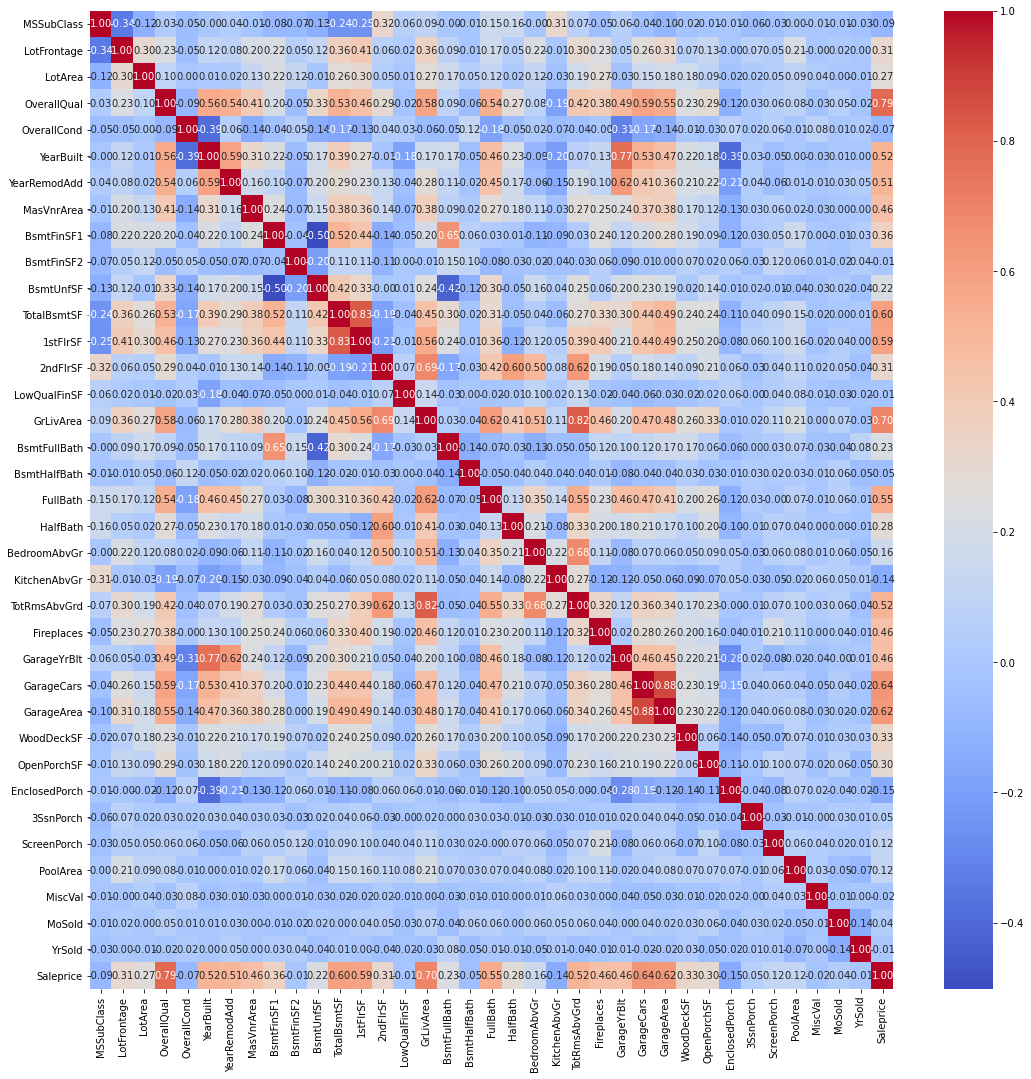

In [29]:

plt.figure(figsize=(18,18))
sns.heatmap(corr_matrix,annot= True, cmap='coolwarm',fmt='.2f')
plt.show()

In [30]:
columns=[]
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        print(col,X_train[col].nunique())
        columns.append(col)

MSZoning 5
Street 2
LotShape 4
LandContour 4
Utilities 2
LotConfig 5
LandSlope 3
Neighborhood 25
Condition1 9
Condition2 8
BldgType 5
HouseStyle 8
RoofStyle 6
RoofMatl 7
Exterior1st 15
Exterior2nd 16
MasVnrType 4
ExterQual 4
ExterCond 5
Foundation 6
BsmtQual 4
BsmtCond 4
BsmtExposure 4
BsmtFinType1 6
BsmtFinType2 6
Heating 6
HeatingQC 5
CentralAir 2
Electrical 4
KitchenQual 4
Functional 7
FireplaceQu 5
GarageType 6
GarageFinish 3
GarageQual 5
GarageCond 5
PavedDrive 3
SaleType 9
SaleCondition 6


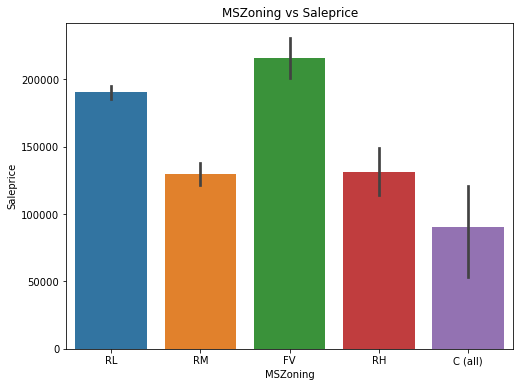

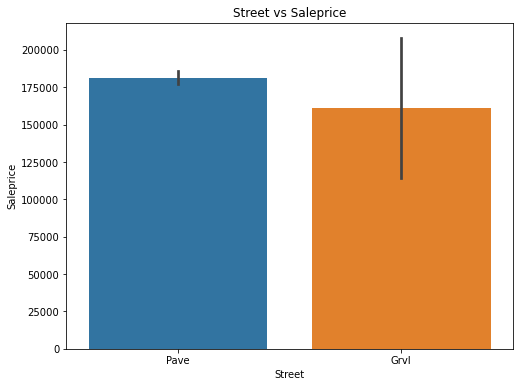

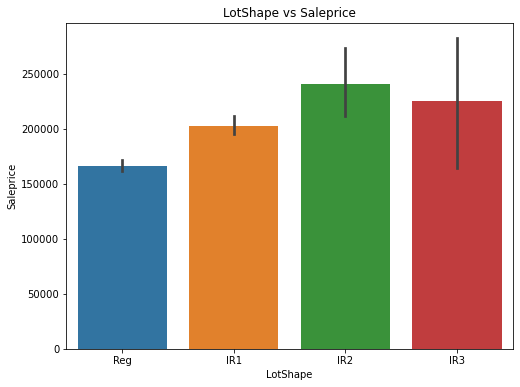

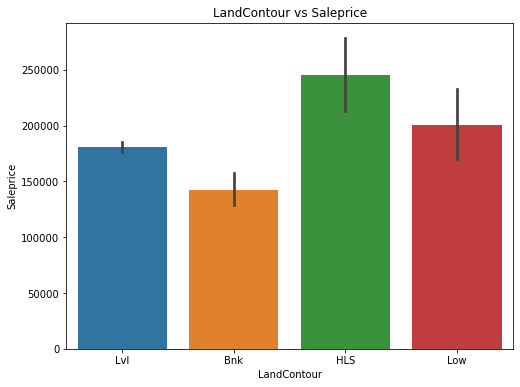

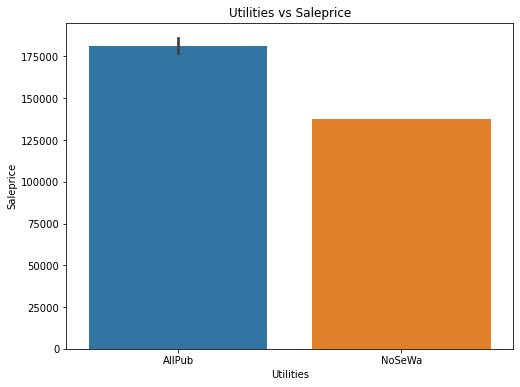

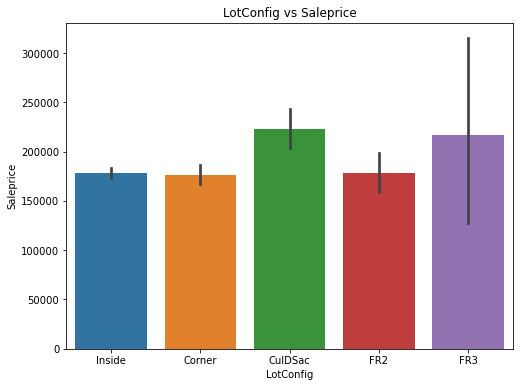

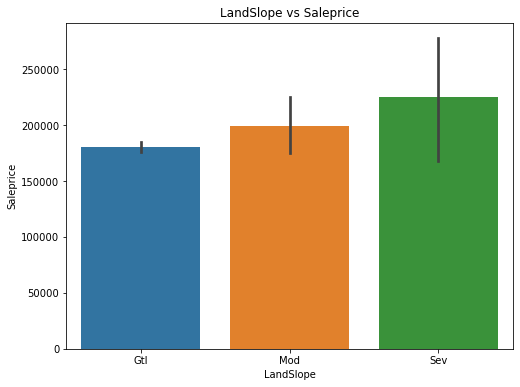

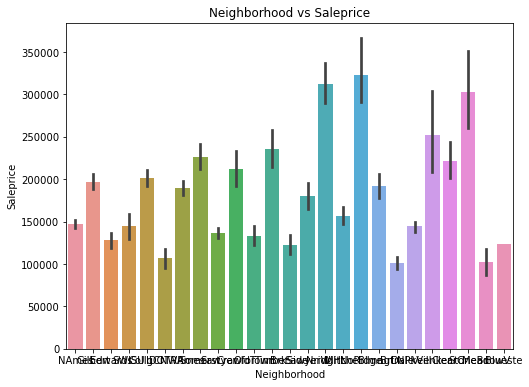

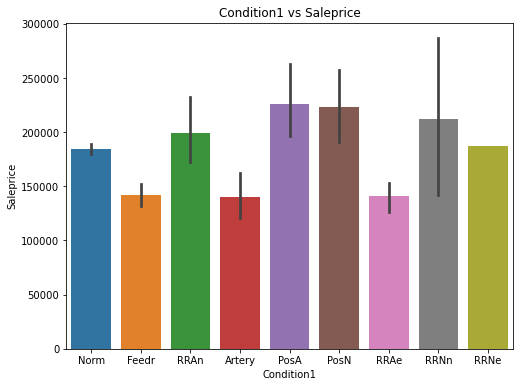

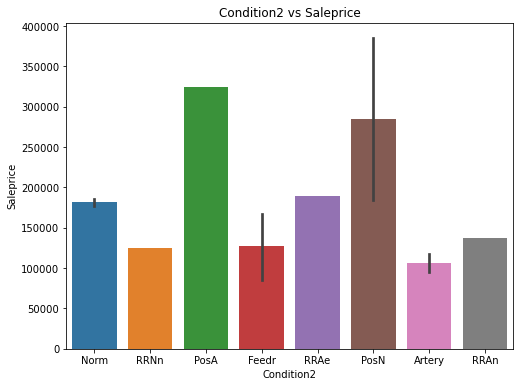

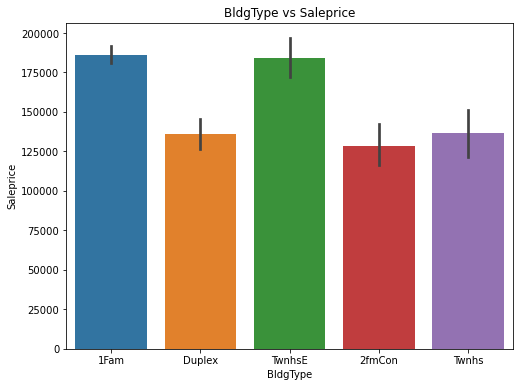

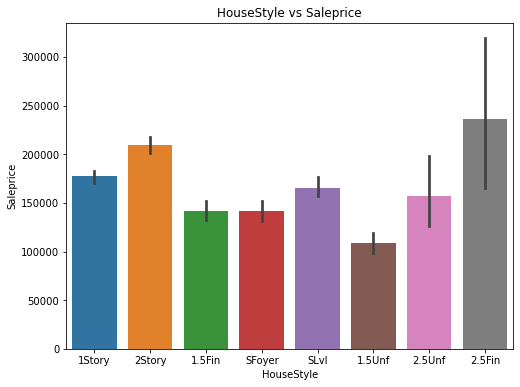

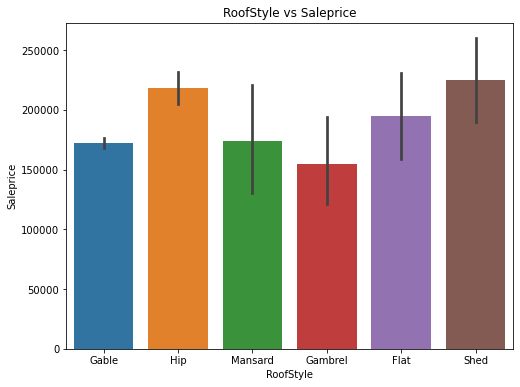

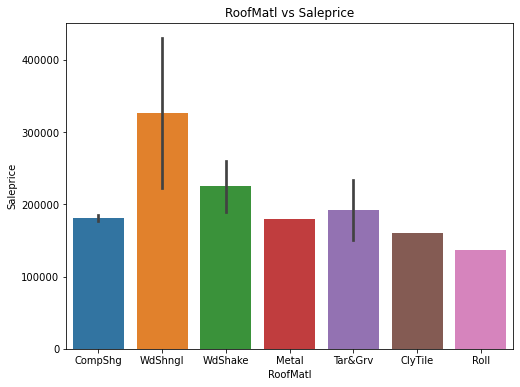

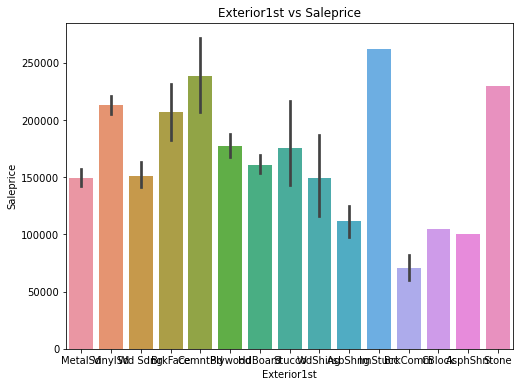

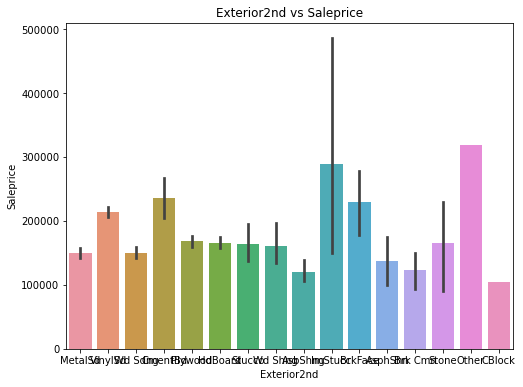

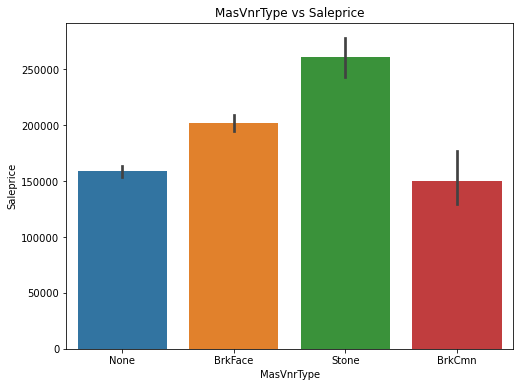

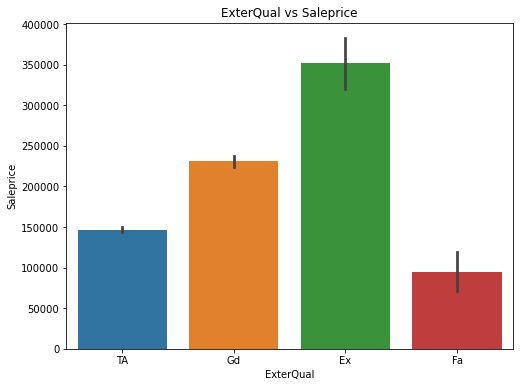

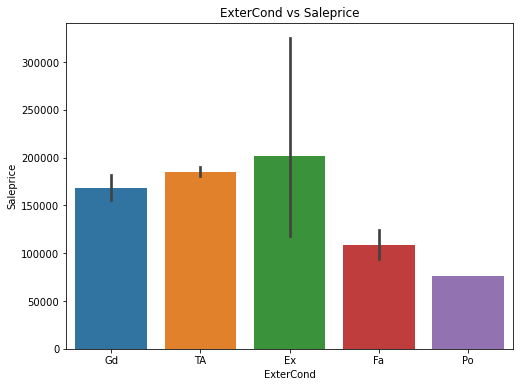

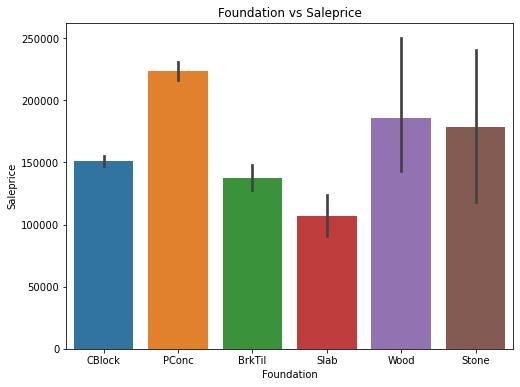

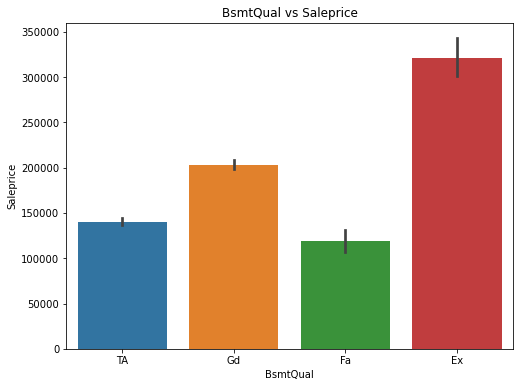

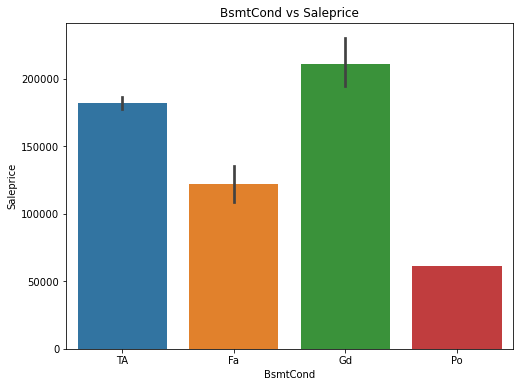

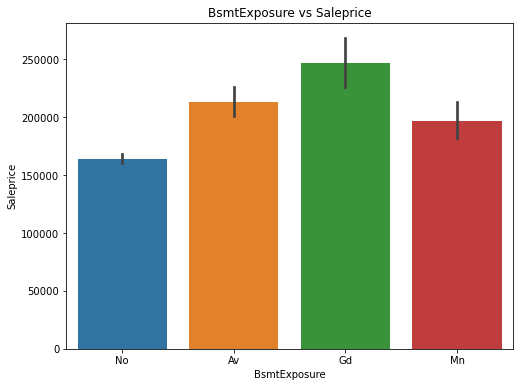

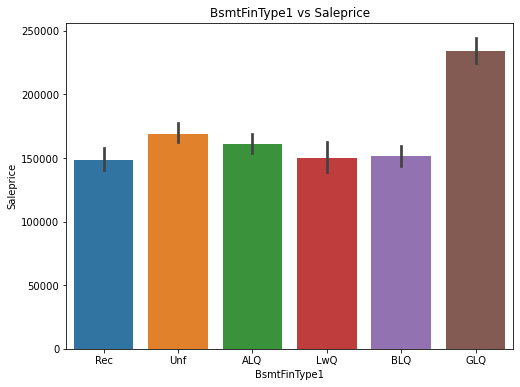

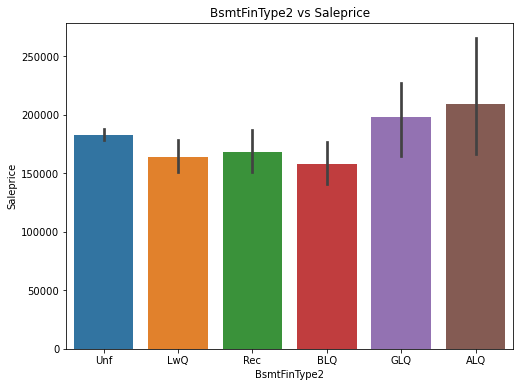

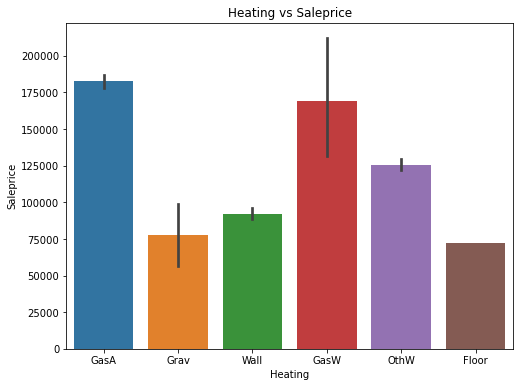

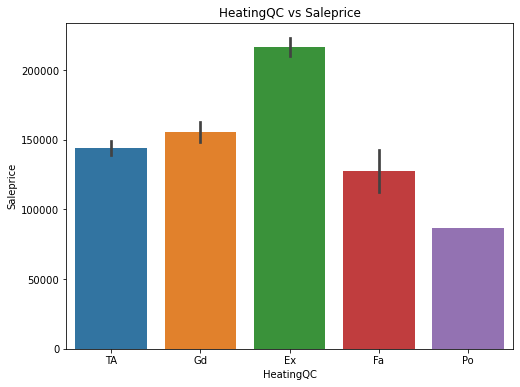

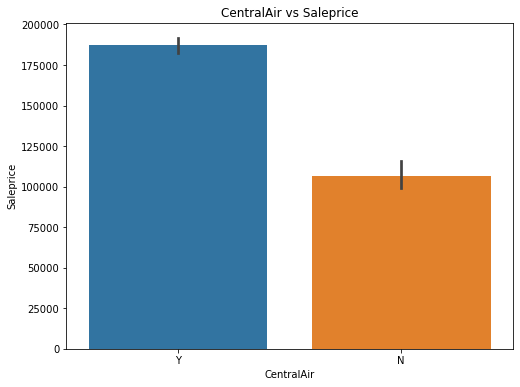

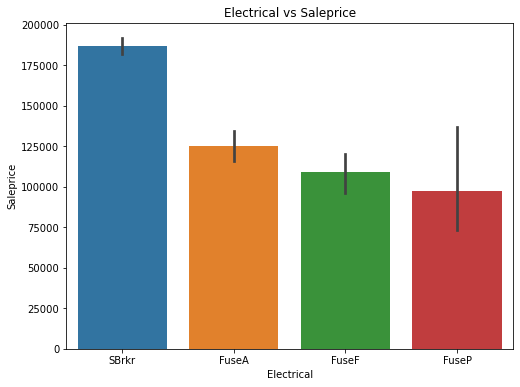

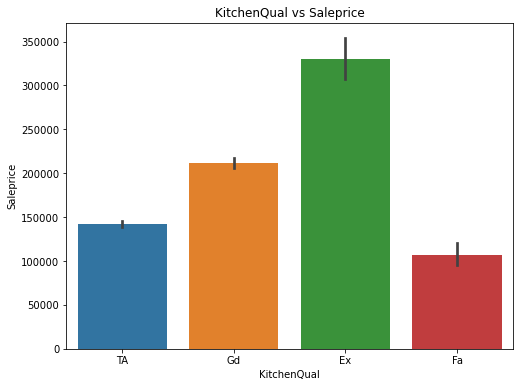

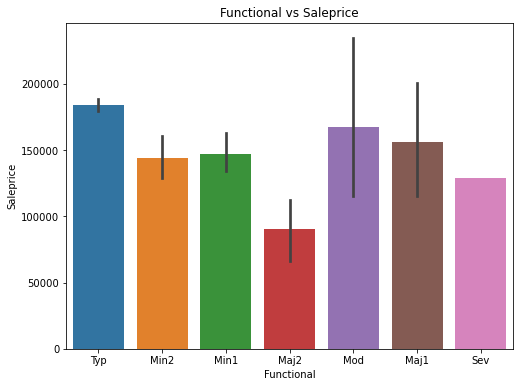

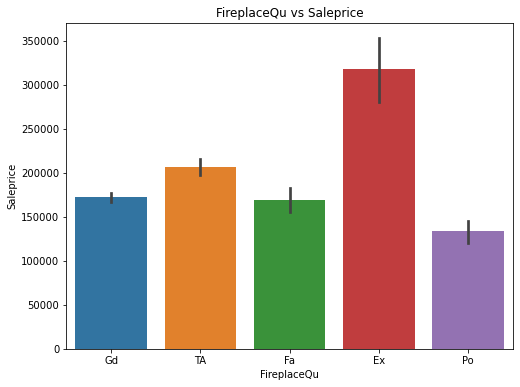

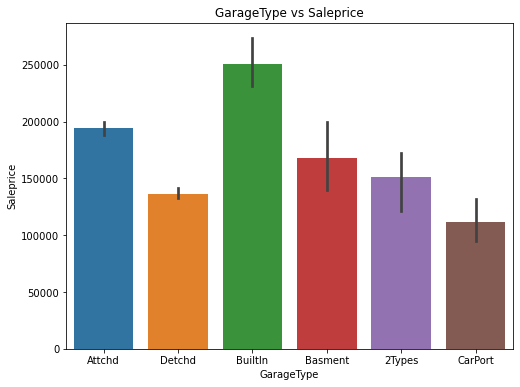

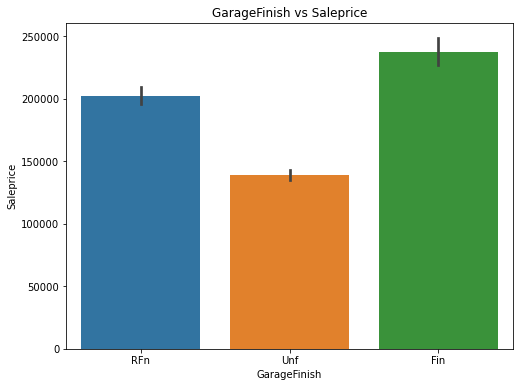

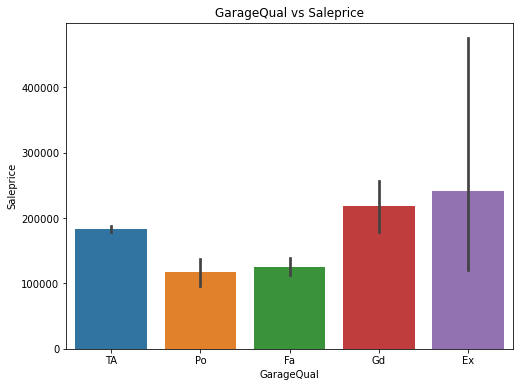

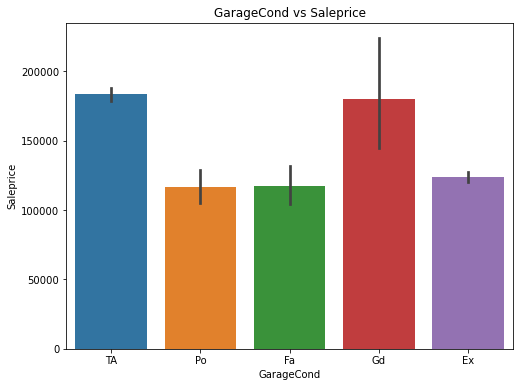

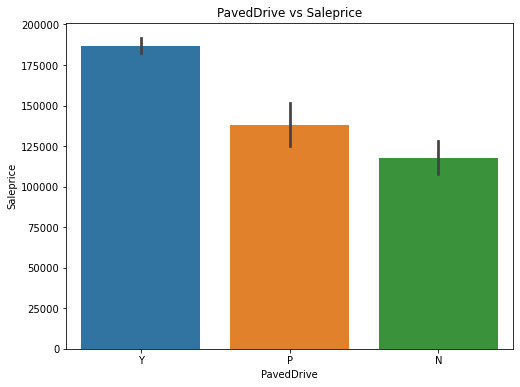

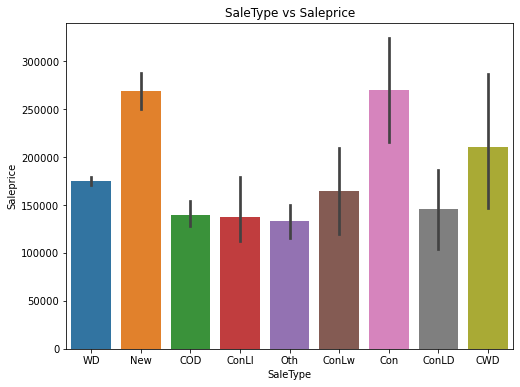

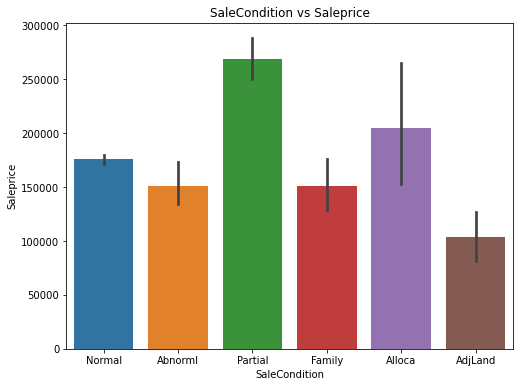

In [31]:
for col in columns:
    plt.figure(figsize=(8, 6))
    sns.barplot(x=col, y='Saleprice', data=X_train)
    plt.title(f'{col} vs Saleprice')
    plt.xlabel(col)
    plt.ylabel('Saleprice')
    plt.show()

In [32]:
for col in columns:
    X_train[col+'f'], labels = pd.factorize(X_train[col])
    mutual_info = mutual_info_regression(X_train[[col+'f']],X_train['Saleprice'])[0]
    print(col,mutual_info)

MSZoning 0.09754646047534887
Street 0
LotShape 0.060800792930248315
LandContour 0.022810852964482153
Utilities 0.0003366141898243358
LotConfig 0.027159650672258895
LandSlope 0
Neighborhood 0.06626323346686513
Condition1 0.02005219590380336
Condition2 0
BldgType 0.05406220275210116
HouseStyle 0.06631814338866104
RoofStyle 0.02801496624648747
RoofMatl 0.003796309420418975
Exterior1st 0.04233188281457112
Exterior2nd 0.03388944056619514
MasVnrType 0.10064304063349772
ExterQual 0.2967375651126962
ExterCond 0.02551468929309575
Foundation 0.17886052157817045
BsmtQual 0.3001876853653773
BsmtCond 0.007108337122108566
BsmtExposure 0.06818209061750968
BsmtFinType1 0.08980173096873867
BsmtFinType2 0
Heating 0.011293136119550073
HeatingQC 0.17664876537575291
CentralAir 0.07422363865947235
Electrical 0.05206498173541774
KitchenQual 0.30148770497246646
Functional 0.00605434617861067
FireplaceQu 0.10020416722171532
GarageType 0.12815376193355887
GarageFinish 0.2413507518250968
GarageQual 0.00301170980

In [33]:
for col in X_train.columns:
    if X_train[col].dtype == 'int64' or X_train[col].dtype == 'float64':
        mutual_info = mutual_info_regression(X_train[[col]],X_train['Saleprice'])[0]
        print(col,mutual_info)

MSSubClass 0.06413632579201023
LotFrontage 0.15296908009302612
LotArea 0.08282187337999747
OverallQual 0.4707409699028742
OverallCond 0.09130104741550005
YearBuilt 0.2672883171018756
YearRemodAdd 0.18309043214137044
MasVnrArea 0.07394544881953324
BsmtFinSF1 0.12752372381485988
BsmtFinSF2 0
BsmtUnfSF 0.06214742621642344
TotalBsmtSF 0.2468486218590118
1stFlrSF 0.20623822761621735
2ndFlrSF 0.11665991248430396
LowQualFinSF 0
GrLivArea 0.3585267203202114
BsmtFullBath 0.02945743909683629
BsmtHalfBath 0
FullBath 0.2524133011361458
HalfBath 0.061304964868247325
BedroomAbvGr 0.057208156873890914
KitchenAbvGr 0.008106955114424386
TotRmsAbvGrd 0.1662619972876529
Fireplaces 0.1719945223585111
GarageYrBlt 0.2707908988866987
GarageCars 0.3513080429183544
GarageArea 0.2934779523514135
WoodDeckSF 0.04990764305693074
OpenPorchSF 0.04265702717958275
EnclosedPorch 0.012523193867005178
3SsnPorch 0
ScreenPorch 0.01869351457752466
PoolArea 0.0055403478636728565
MiscVal 0
MoSold 0
YrSold 0
Saleprice 1.294736

In [34]:

X_train = X_train.drop(X_train.columns[75:124],axis=1)
        

In [35]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 255 to 1127
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    1168 non-null   float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   LotShape       1168 non-null   object 
 6   LandContour    1168 non-null   object 
 7   Utilities      1168 non-null   object 
 8   LotConfig      1168 non-null   object 
 9   LandSlope      1168 non-null   object 
 10  Neighborhood   1168 non-null   object 
 11  Condition1     1168 non-null   object 
 12  Condition2     1168 non-null   object 
 13  BldgType       1168 non-null   object 
 14  HouseStyle     1168 non-null   object 
 15  OverallQual    1168 non-null   int64  
 16  OverallCond    1168 non-null   int64  
 17  YearBuilt      1168 non-null   int64  
 18  YearRe

In [36]:
X_train['Age'] = X_train['YrSold'] - X_train['YearBuilt']


In [37]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 255 to 1127
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    1168 non-null   float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   LotShape       1168 non-null   object 
 6   LandContour    1168 non-null   object 
 7   Utilities      1168 non-null   object 
 8   LotConfig      1168 non-null   object 
 9   LandSlope      1168 non-null   object 
 10  Neighborhood   1168 non-null   object 
 11  Condition1     1168 non-null   object 
 12  Condition2     1168 non-null   object 
 13  BldgType       1168 non-null   object 
 14  HouseStyle     1168 non-null   object 
 15  OverallQual    1168 non-null   int64  
 16  OverallCond    1168 non-null   int64  
 17  YearBuilt      1168 non-null   int64  
 18  YearRe

In [38]:
X_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292 entries, 893 to 723
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     292 non-null    int64  
 1   MSZoning       292 non-null    object 
 2   LotFrontage    292 non-null    float64
 3   LotArea        292 non-null    int64  
 4   Street         292 non-null    object 
 5   LotShape       292 non-null    object 
 6   LandContour    292 non-null    object 
 7   Utilities      292 non-null    object 
 8   LotConfig      292 non-null    object 
 9   LandSlope      292 non-null    object 
 10  Neighborhood   292 non-null    object 
 11  Condition1     292 non-null    object 
 12  Condition2     292 non-null    object 
 13  BldgType       292 non-null    object 
 14  HouseStyle     292 non-null    object 
 15  OverallQual    292 non-null    int64  
 16  OverallCond    292 non-null    int64  
 17  YearBuilt      292 non-null    int64  
 18  YearRemo

In [39]:
X_valid['Age'] = X_valid['YrSold']- X_valid['YearBuilt']

In [82]:
housing_price_test['Age'] = housing_price_test['YrSold'] - housing_price_test['YearBuilt']

In [40]:
X_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [83]:
housing_price_test.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [41]:
combined_data = pd.concat([X_train,X_valid],axis=0)

In [42]:
for col in combined_data.columns:
    if combined_data[col].dtype == 'object':
        combined_data_encoded_column = pd.get_dummies(combined_data[col],prefix=col)
        combined_data = pd.concat([combined_data, combined_data_encoded_column],axis=1)

In [43]:
X_train = combined_data[:len(X_train)]

In [44]:
X_valid = combined_data[len(X_train):]

In [84]:
for col in housing_price_test.columns:
    if housing_price_test[col].dtype == 'object':
        housing_price_test_encoded = pd.get_dummies(housing_price_test[col],prefix=col)
        housing_price_test = pd.concat([housing_price_test,housing_price_test_encoded],axis=1)

In [45]:
X_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=315)

In [46]:
X_valid.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=315)

In [85]:
housing_price_test.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=299)

In [87]:
combined_data_cols= set(combined_data.columns)
housing_price_test_cols = set(housing_price_test.columns)

In [88]:
missing_cols = combined_data_cols - housing_price_test_cols

In [89]:
for col in missing_cols:
    housing_price_test[col] = 0

In [90]:
housing_price_test = housing_price_test[combined_data.columns]

In [91]:
housing_price_test.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=315)

In [47]:
X_train = X_train.drop(columns,axis=1)

In [48]:
X_valid = X_valid.drop(columns,axis=1)

In [92]:
housing_price_test = housing_price_test.drop(columns,axis=1)

In [49]:
X_train.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=276)

In [50]:
X_valid.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=276)

In [93]:
housing_price_test.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=276)

In [51]:
X_train['SalePrice'] = y_train

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

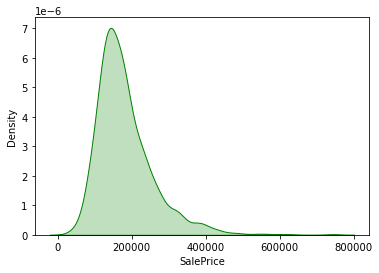

In [52]:
sns.kdeplot(data = X_train["SalePrice"], shade = True, color = 'green')

In [53]:
X_train['SalePrice'] = np.log(X_train['SalePrice'])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

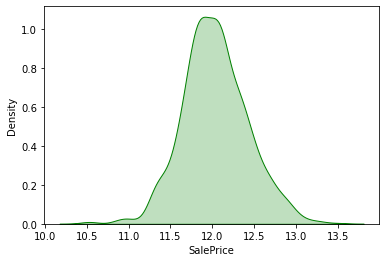

In [54]:
sns.kdeplot(data = X_train["SalePrice"], shade = True, color = 'green')

In [55]:
X_train = X_train.drop('SalePrice',axis=1)

In [56]:
model_1 = RandomForestRegressor(n_estimators = 200,max_depth=5)

In [57]:
model_1.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, n_estimators=200)

In [58]:
y_pred = model_1.predict(X_valid)

In [59]:
mse = mean_squared_error(y_valid,y_pred)

In [60]:
print(mse)

1043516618.2207739


In [61]:
model_2 = XGBRegressor(n_estimators = 1000,learning_rate= 0.01,max_depth=5,objective='reg:squarederror', subsample=0.79,
                       colsample_bytree= 0.8,eval_metric= 'rmse'    )

In [62]:
model_2.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [63]:
y_pred_1 = model_2.predict(X_valid)

In [64]:
mse_1 = mean_squared_error(y_valid,y_pred_1)

In [65]:
print(mse_1)

725237105.1214651


In [94]:
y_pred_2 = model_2.predict(housing_price_test)

In [96]:
housing_price_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,0,1,0,0,0,0,1,0
1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [103]:
ids = housing_price_test.index

In [104]:
print(ids)

Int64Index([1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469, 1470,
            ...
            2910, 2911, 2912, 2913, 2914, 2915, 2916, 2917, 2918, 2919],
           dtype='int64', name='Id', length=1459)


In [105]:
submission = pd.DataFrame({'Id':ids, 'SalePrice': y_pred_2 })

In [106]:
submission.head()

,Id,SalePrice
0,1461,126269.210938
1,1462,153743.453125
2,1463,183023.984375
3,1464,190806.546875
4,1465,195779.906250


In [107]:
submission.to_csv("submission.csv",index=False)